In [2]:
import numpy as np
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_visualization as dv
from pathlib import Path
import pandas as pd    
import read_data_functions as rdf
import plot_functions as pf
from initializer import InitialThangs
import Statistics as st
import constants
import pingouin as pg
# import viper as vp
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_columns', None)


In [3]:
EXPERIMENT = "Exp2"
plt.style.use('C:/Users/Seth Sullivan/anaconda3/Lib/site-packages/matplotlib/mpl-data/stylelib/cashaback_light.mplstyle')
wheel = dv.ColorWheel()

# Get path and save path 
DATA_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\results")
SAVE_PATH = Path(rf"D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\paper\figures")
it = InitialThangs(EXPERIMENT)

# Data and Stats

In [4]:
rawdata_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_reaction_time_df.pkl") 
data_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_stats_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_stats_df.pkl") 
exp2_anova_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_anova_df.pkl") 
exp2_pvals_df = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_pvals_df.pkl") 
exp2_cles_df  = pd.read_pickle(DATA_PATH / "participant_data" / "Exp2_cles_df.pkl") 

# Plotting Constants

In [5]:
collapse_colors = [
    wheel.blend_colors(constants.xticklabel_colors_means[0],constants.xticklabel_colors_means[3]),
    wheel.blend_colors(constants.xticklabel_colors_means[1],constants.xticklabel_colors_means[4]),
    wheel.blend_colors(constants.xticklabel_colors_means[2],constants.xticklabel_colors_means[5])
]

# Figures

## Median Reaction Time

In [6]:
exp2_pvals_df

,Metric,Collapsed,01,02,13,23
0,Reaction_Time_Median,NaN,0.0,0.045356,0.0,0.036797
1,Reaction_Time_SD,react_guess,0.0,NaN,NaN,NaN
2,Reaction_Time_IQR,NaN,0.0,0.000009,0.0,0.000000


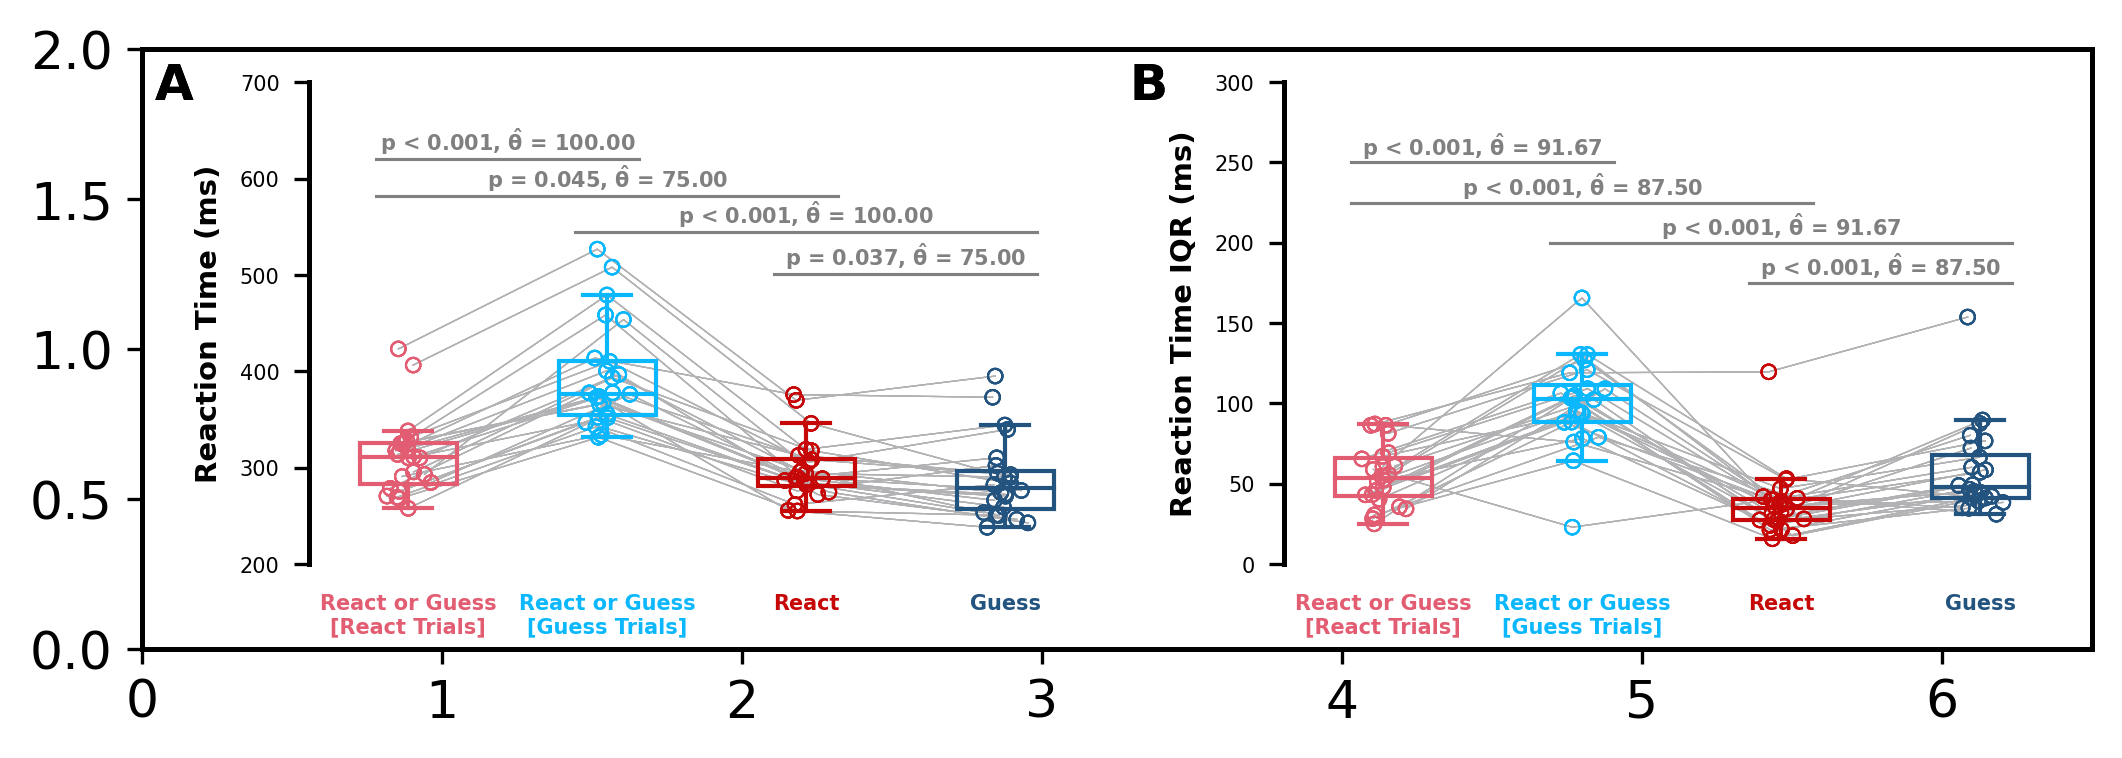

In [31]:
metric_names = ['Reaction_Time_Median',"Reaction_Time_IQR"]
legend_fontsize = 5
ticklabel_fontsize = 5
axeslabel_fontsize = 7

xlabs = ['React or Guess\n[React Trials]','React or Guess\n[Guess Trials]','React','Guess']
colors = [wheel.rak_red, wheel.rak_blue, wheel.dark_red, wheel.dark_blue]
combos = ['01','02','13','23',]

ylims = [(200,700), (0,300)]
xlocs = np.arange(0,4,1)
ylocs = [np.arange(200,max(ylims[0])+1,100),np.arange(0,max(ylims[1])+1,50)]
ylabels = ["Reaction Time (ms)", "Reaction Time IQR (ms)"]
w,h = 6.5,2
fig = pf.NewFigure("ab",figsize = (w,h), dpi = 300)
bw = (0.3*w)/4 # box widths of all boxes combined takes up 30% of the width
box_lw = 1
ax1,ax2 = fig.axes['a'], fig.axes['b']
statline_y = [620,250]
shift = np.array([[-38,-38,-43,-38],[-25]*4])
h=[3,1]

for i,ax in enumerate([ax1,ax2]):
    metric_name = metric_names[i]
    metric = st.df_to_array(data_df[metric_name],
                        it.num_subjects, it.num_blocks) 
    pvals = exp2_pvals_df.query("Metric == @metric_name").iloc[0]
    cles = exp2_cles_df.query("Metric == @metric_name").iloc[0]
    for j in range(4):
        dv.boxplot(metric[:,j],
                   x_pos = xlocs[j],
                   ax=ax,box_width = bw,
                   box_lw=box_lw, linewidth=box_lw, 
                   whisker_lw=box_lw, color = colors[j])
        
        dv.jitter_array(ax =ax, 
                        x_positions = xlocs,
                        data = metric.T,
                        circle_size = 12,
                        include_mean=False,
                        data_color = colors, 
                        data_edge_color = wheel.light_grey, 
                        circle_lw=0.5)
        np.random.seed(2)
    for j,c in enumerate(combos):
        a = int(c[0])
        b = int(c[1])
        dv.stat_annotation(ax, xlocs[a]-bw/3, xlocs[b]+bw/3,
                            statline_y[i],
                            p_val=pvals[c],
                            cles=cles[c],
                            fontsize=legend_fontsize,
                            h=h[i], 
                            lw=0.75)
        statline_y[i] += shift[i,j]

    [ticklabel.set_color(color) for (color,ticklabel) in zip(colors,ax.xaxis.get_ticklabels())]
    [ticklabel.set_fontweight("bold") for ticklabel in ax.xaxis.get_ticklabels()]
    ax.set_xticks(xlocs, labels = xlabs)
    ax.set_yticks(ylocs[i])
    ax.set_yticklabels(ylocs[i], fontsize=ticklabel_fontsize)
    ax.set_xticklabels(xlabs, fontsize=ticklabel_fontsize)
    ax.set_ylabel(ylabels[i], 
                  fontsize=axeslabel_fontsize)
    ax.set_ylim(ylims[i])
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False) 
    fig.add_all_letters(va='top', verticalshift=5, horizontalshift=-37)
plt.show()
fig.savefig(SAVE_PATH / "exp2_reaction_figure_panel.png" )

# Supplementary Figures (?)

## Reaction Time Distributions

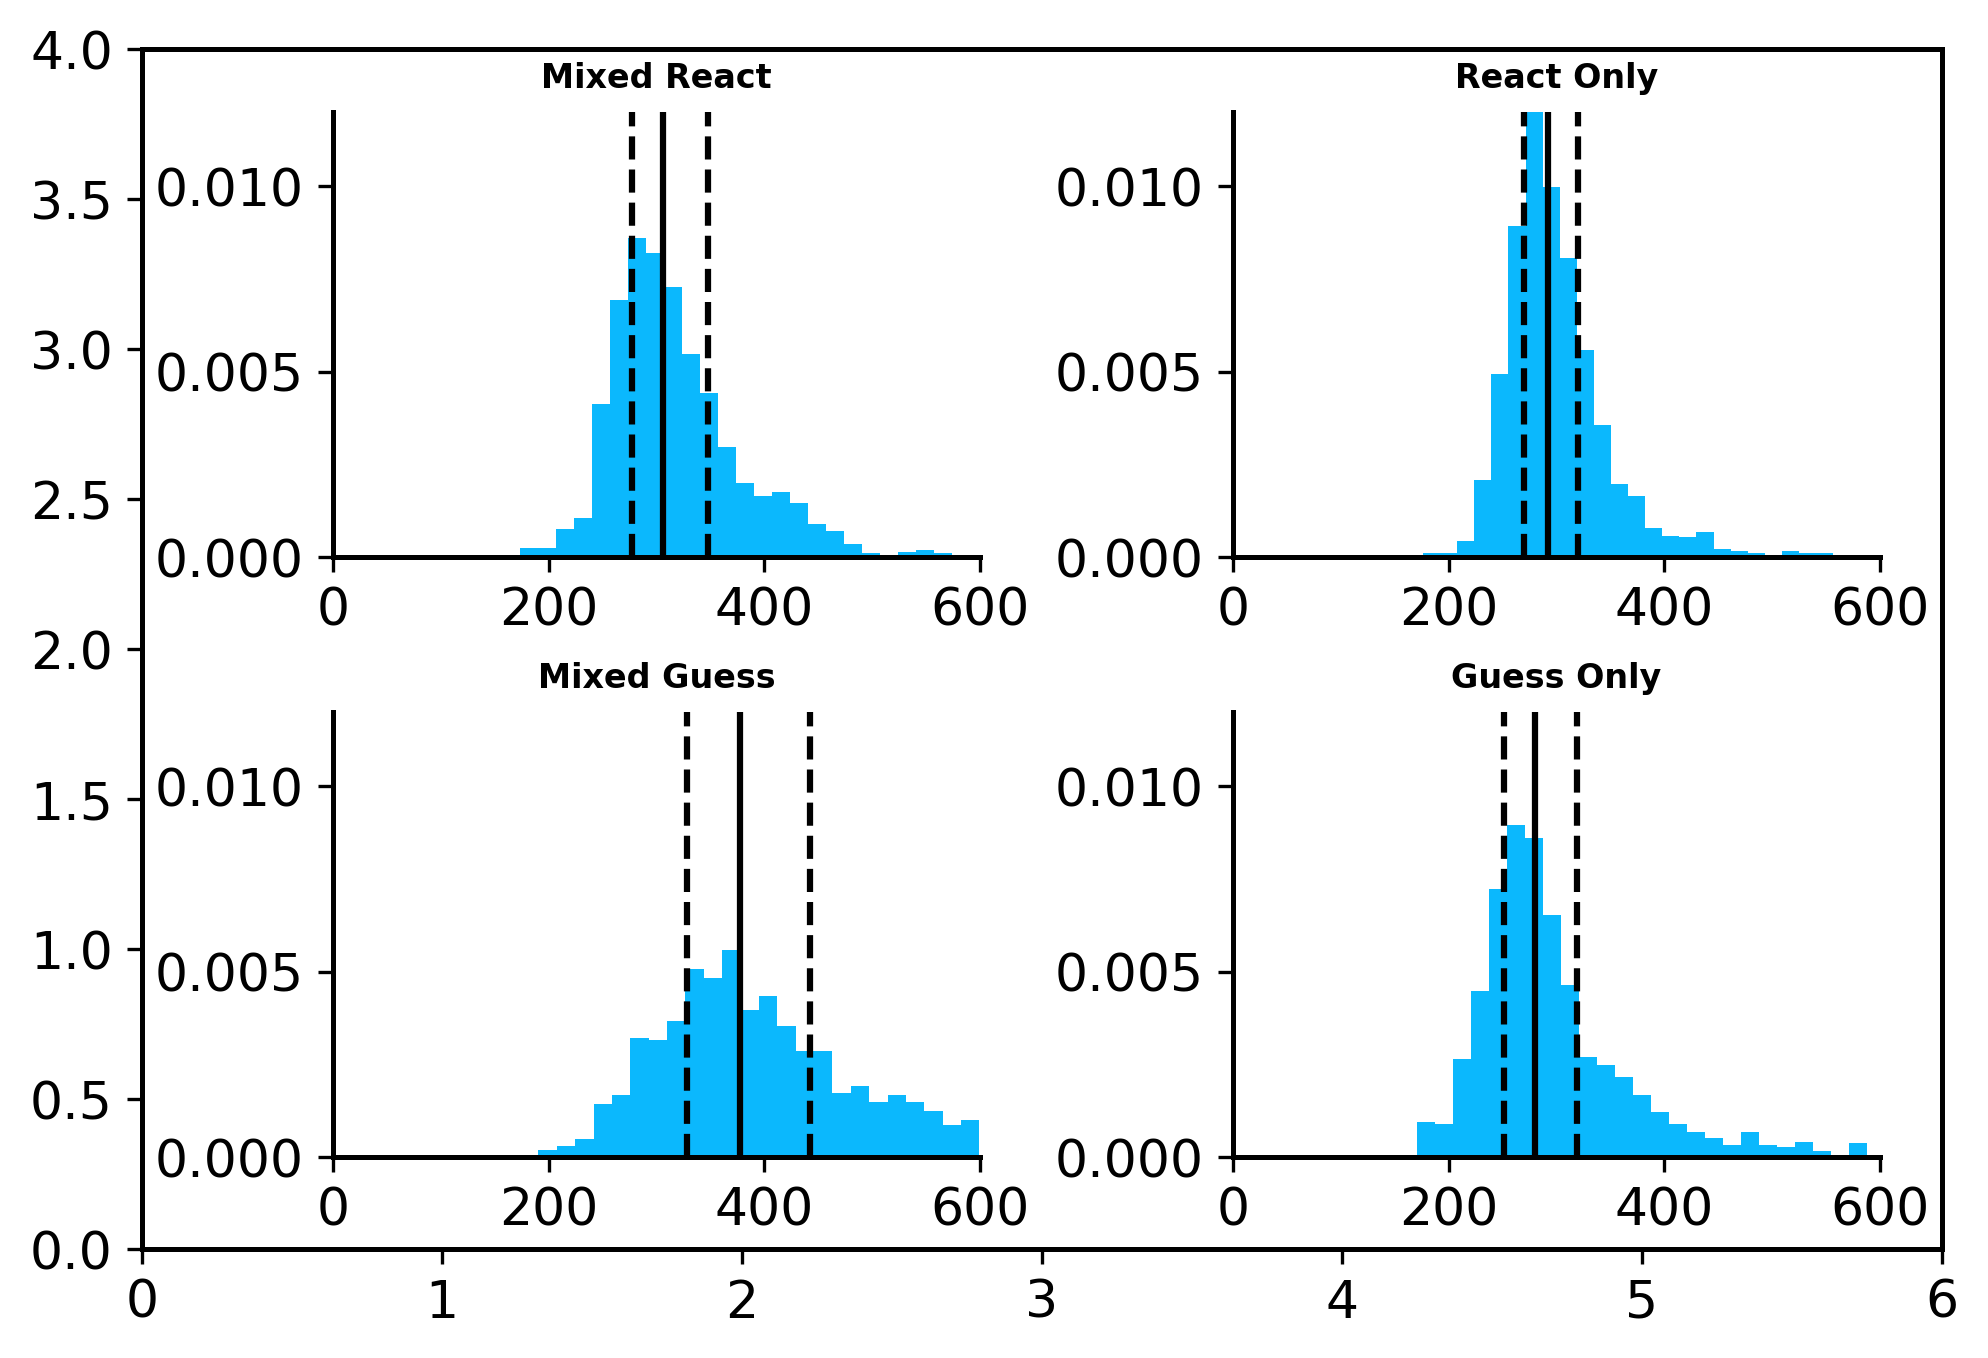

In [8]:
fig = pf.NewFigure("ab;cd",figsize = (6,4), dpi = 300)
ax1,ax2,ax3,ax4 = fig.axes.values()
filters = [["mixed","react"],
           ["react_only","react"],
           ['mixed',"guess"],
           ['guess_only','guess']]
titles = ["Mixed React", "React Only", "Mixed Guess", "Guess Only"]
for i,ax in enumerate(fig.axes.values()):
    condition = filters[i][0]
    decision_type = filters[i][1]
    values = rawdata_df.query('condition == @condition & decision_type == @decision_type')['reaction_time'].to_numpy()
    ax.hist(values, density=True,bins=25)
    ax.axvline(np.nanmedian(values))
    ax.axvline(np.nanquantile(values,0.25),ls='--')
    ax.axvline(np.nanquantile(values,0.75),ls='--')
    ax.set_xlim(0,600)
    ax.set_ylim(0,0.012)
    ax.set_title(titles[i], fontsize = 8)
    

## Task Switching

In [9]:
# Get the reactions that only came after a reaction
repeat_df = pd.DataFrame(columns=rawdata_df.columns)
switch_df = pd.DataFrame(columns=rawdata_df.columns)
c1,c2 = 0,0
for index,row in rawdata_df.query("condition == 'mixed'").iterrows():
    if index == 0:
        pass
    else:
        if last_row['decision_type'] == row['decision_type']:
            repeat_df.loc[c1] = row
            c1+=1
        else:
            switch_df.loc[c2] = row
            c2+=1
    last_row = row['decision_type']

TypeError: string indices must be integers

In [ ]:
def get_metric(df:pd.DataFrame, metric:str, groupby:list,  condition:str, decision_type:str) -> np.ndarray:
        specific_condition = df.query(f"condition=='mixed' & decision_type==@decision_type").reset_index()
        groupby_median = specific_condition.groupby(groupby)[[metric]].median()
        return groupby_median.values.squeeze().astype(float)

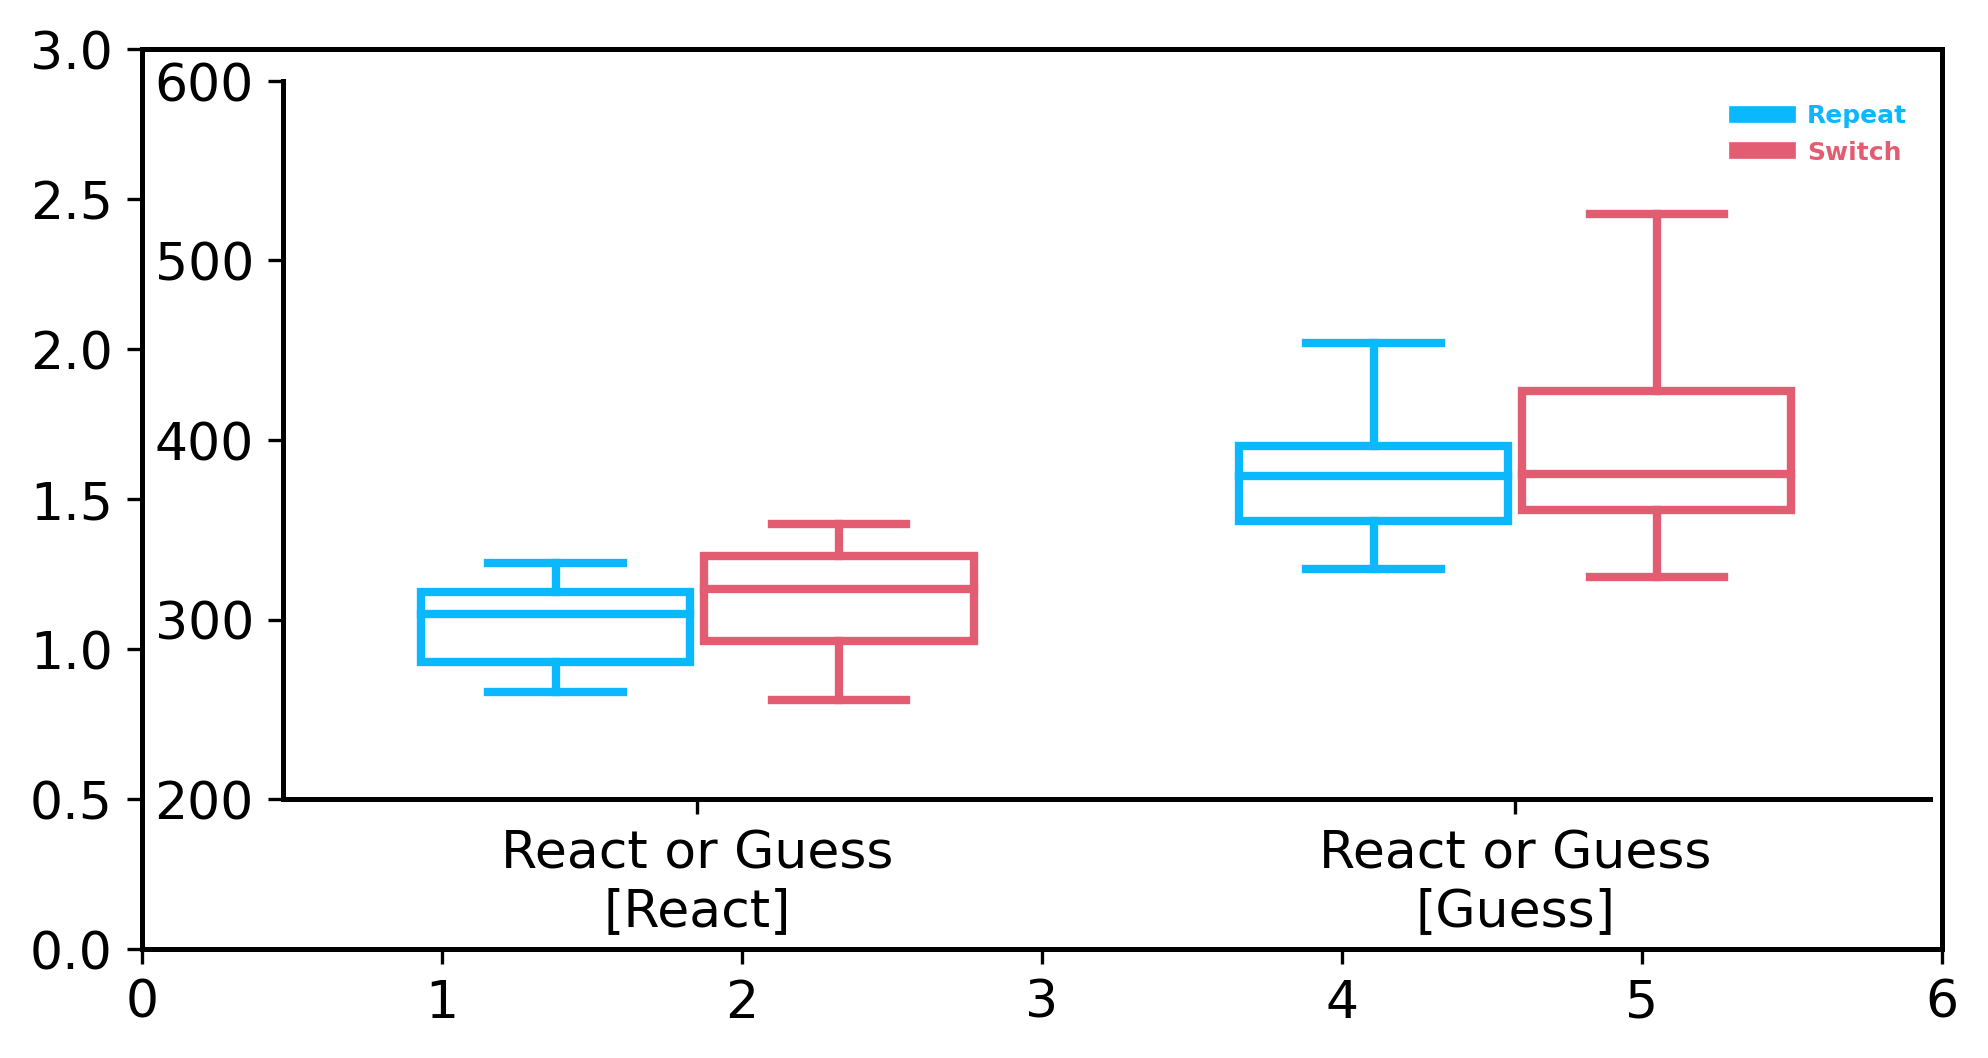

In [ ]:
metrics = [get_metric(repeat_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'react'),
           get_metric(switch_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'react'),
           get_metric(repeat_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'guess'),
           get_metric(switch_df,metric='reaction_time',groupby=['subject'], condition='mixed',decision_type = 'guess'),
]       
fig = pf.NewFigure('a',figsize=(6,3),dpi=300,)
ax = fig.axes['a']
bw = (0.1*w)/2 # box widths of all boxes combined takes up 30% of the width
xlocs = np.linspace(0,1.5,2)
pf.boxplot(ax, xlocs[0]-bw/2, data=metrics[0], box_width=bw*0.95, lw=2, color = wheel.rak_blue)
pf.boxplot(ax, xlocs[0]+bw/2, data=metrics[1], box_width=bw*0.95,lw=2, color = wheel.rak_red)
pf.boxplot(ax, xlocs[1]-bw/2, data=metrics[2], box_width=bw*0.95,lw=2, color = wheel.rak_blue)
pf.boxplot(ax, xlocs[1]+bw/2, data=metrics[3], box_width=bw*0.95,lw=2, color = wheel.rak_red)
        
ax.set_xticks(xlocs, labels = ["React or Guess\n[React]","React or Guess\n[Guess]"])
ax.set_ylim(200,600)
dv.legend(ax, labels = ['Repeat',"Switch"], colors = [wheel.rak_blue, wheel.rak_red])

In [ ]:
rawdata_df.query("subject == 1")['decision_type'].to_numpy()[:100]

array(['guess', 'react', 'guess', 'guess', 'guess', 'react', 'guess',
       'guess', 'react', 'react', 'guess', 'guess', 'react', 'guess',
       'react', 'react', 'guess', 'react', 'react', 'react', 'react',
       'react', 'guess', 'react', 'guess', 'react', 'guess', 'react',
       'react', 'react', 'react', 'react', 'react', 'guess', 'guess',
       'react', 'guess', 'react', 'guess', 'react', 'react', 'react',
       'react', 'react', 'react', 'react', 'guess', 'guess', 'react',
       'guess', 'guess', 'guess', 'guess', 'guess', 'react', 'guess',
       'react', 'guess', 'react', 'guess', 'react', 'react', 'react',
       'react', 'guess', 'guess', 'react', 'guess', 'guess', 'guess',
       'guess', 'guess', 'react', 'guess', 'guess', 'guess', 'react',
       'guess', 'guess', 'guess', 'react', 'guess', 'react', 'react',
       'guess', 'react', 'guess', 'guess', 'guess', 'guess', 'guess',
       'react', 'guess', 'react', 'react', 'react', 'react', 'guess',
       'react', 'gue